In [1]:
import pandas as pd

banknotes = pd.read_csv('data/banknotes.csv')
banknotes['class'] = banknotes['class'].map({0: 'real', 1:'fake'})

In [2]:
banknotes.head(3)

,variace,skewness,curtosis,entropy,class
0,3.6216,8.6661,-2.8073,-0.44699,real
1,4.5459,8.1674,-2.4586,-1.46210,real
2,3.8660,-2.6383,1.9242,0.10645,real


In [3]:
# Import seaborn
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

In [4]:
sns.set_style('darkgrid')
mpl.rcParams['figure.figsize'] = [15,10]

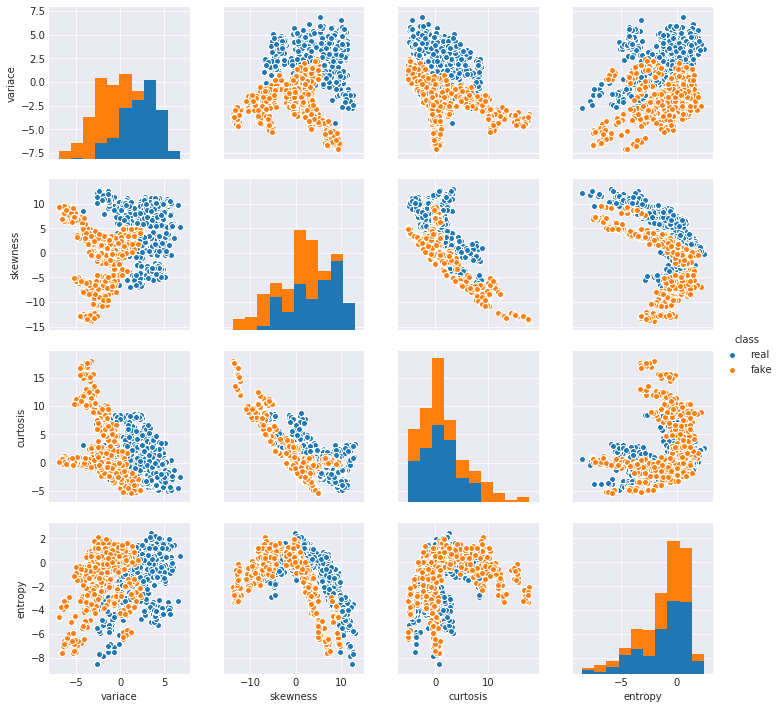

Dataset stats: 
            variace     skewness     curtosis      entropy
count  1372.000000  1372.000000  1372.000000  1372.000000
mean      0.433735     1.922353     1.397627    -1.191657
std       2.842763     5.869047     4.310030     2.101013
min      -7.042100   -13.773100    -5.286100    -8.548200
25%      -1.773000    -1.708200    -1.574975    -2.413450
50%       0.496180     2.319650     0.616630    -0.586650
75%       2.821475     6.814625     3.179250     0.394810
max       6.824800    12.951600    17.927400     2.449500
Observations per class: 
 real    762
fake    610
Name: class, dtype: int64


In [5]:
# Use pairplot and set the hue to be our class
sns.pairplot(banknotes, hue='class') 

# Show the plot
plt.show()

# Describe the data
print('Dataset stats: \n', banknotes.describe())

# Count the number of observations of each class
print('Observations per class: \n', banknotes['class'].value_counts())

In [6]:
# Import the sequential model and dense layer
from keras.models import Sequential
from keras.layers import Dense

# Create a sequential model
model = Sequential()

# Add a dense layer 
model.add(Dense(1, input_shape=(4,), activation='sigmoid'))

# Compile your model
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

# Display a summary of your model
model.summary()

Using TensorFlow backend.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 5         
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [8]:
from sklearn.model_selection import train_test_split

banknotes = pd.read_csv('data/banknotes.csv')
X = banknotes.drop('class', axis=1)
y = banknotes['class']
X_train, X_test, y_train, y_test = train_test_split(
                     X, y, test_size=0.33, random_state=42)

In [9]:
# Train your model for 20 epochs
model.fit(X_train, y_train, epochs=20, verbose=0)

# Evaluate your model accuracy on the test set
accuracy = model.evaluate(X_test, y_test)[1]

# Print accuracy
print('Accuracy:',accuracy)

453/453 [==============================] - 0s 185us/step
Accuracy: 0.951434850692749


In [10]:
# Instantiate a sequential model
model = Sequential()
  
# Add 3 dense layers of 128, 64 and 32 neurons each
model.add(Dense(128, input_shape=(2,), activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
  
# Add a dense layer with as many neurons as competitors
model.add(Dense(4, activation='softmax'))
  
# Compile your model using categorical_crossentropy loss
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [11]:
darts = pd.read_csv('data/darts.csv')

In [12]:
# Transform into a categorical variable
darts.competitor = pd.Categorical(darts.competitor)

# Assign a number to each category (label encoding)
darts.competitor = darts.competitor.cat.codes 

# Print the label encoded competitors
print('Label encoded competitors: \n',darts.competitor.head())

Label encoded competitors: 
 0    2
1    3
2    1
3    0
4    2
Name: competitor, dtype: int8


In [13]:
# Import to_categorical from keras utils module
from keras.utils import to_categorical

# Use to_categorical on your labels
coordinates = darts.drop(['competitor'], axis=1)
competitors = to_categorical(darts.competitor)

# Now print the to_categorical() result
print('One-hot encoded competitors: \n',competitors)

One-hot encoded competitors: 
 [[0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 ...
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]]


In [14]:
coord_train, coord_test, competitors_train, competitors_test = train_test_split(coordinates,
                                                                               competitors,
                                                                               test_size=.33,
                                                                               random_state=73)

In [15]:
# Train your model on the training data for 200 epochs
model.fit(coord_train, competitors_train, epochs=200, verbose=0)

# Evaluate your model accuracy on the test data
accuracy = model.evaluate(coord_test, competitors_test)[1]

264/264 [==============================] - 0s 198us/step


In [16]:
# Print accuracy
print('Accuracy:', accuracy)

Accuracy: 0.7878788113594055


In [17]:
import numpy as np
# Predict on coords_small_test
preds = model.predict(coord_test)

# Print preds vs true values
print("{:45} | {}".format('Raw Model Predictions','True labels'))
for i,pred in enumerate(preds):
  print("{} | {}".format(pred,competitors_test[i]))

Raw Model Predictions                         | True labels
[0.16377082 0.02930512 0.02467502 0.782249  ] | [0. 0. 0. 1.]
[0.17817383 0.00193751 0.7807879  0.0391008 ] | [0. 0. 1. 0.]
[1.08098192e-03 9.96860743e-01 1.20386736e-04 1.93795259e-03] | [0. 1. 0. 0.]
[0.16332759 0.01567323 0.80437154 0.01662762] | [0. 0. 1. 0.]
[0.62007064 0.0034684  0.3571634  0.01929758] | [0. 0. 1. 0.]
[0.21256001 0.00172597 0.76318055 0.02253347] | [0. 0. 1. 0.]
[5.7592027e-02 9.3755317e-01 4.3725334e-03 4.8215850e-04] | [0. 1. 0. 0.]
[0.09484489 0.01317746 0.8778478  0.01412986] | [1. 0. 0. 0.]
[0.27426815 0.01351995 0.70694864 0.00526323] | [0. 0. 1. 0.]
[0.01342368 0.00423916 0.00467871 0.9776585 ] | [1. 0. 0. 0.]
[0.47148725 0.01184889 0.51271385 0.00395001] | [1. 0. 0. 0.]
[0.34345824 0.0019723  0.6373701  0.01719939] | [1. 0. 0. 0.]
[1.15706818e-02 1.17064705e-02 2.64869188e-04 9.76458013e-01] | [0. 0. 0. 1.]
[0.18726362 0.72374445 0.03036503 0.05862685] | [0. 1. 0. 0.]
[0.35959217 0.0272132  0.091

In [18]:
# Extract the indexes of the highest probable predictions
preds = [np.argmax(pred) for pred in preds]

# Print preds vs true values
print("{:10} | {}".format('Rounded Model Predictions','True labels'))
for i,pred in enumerate(preds):
  print("{:25} | {}".format(pred,competitors_test[i]))

Rounded Model Predictions | True labels
                        3 | [0. 0. 0. 1.]
                        2 | [0. 0. 1. 0.]
                        1 | [0. 1. 0. 0.]
                        2 | [0. 0. 1. 0.]
                        0 | [0. 0. 1. 0.]
                        2 | [0. 0. 1. 0.]
                        1 | [0. 1. 0. 0.]
                        2 | [1. 0. 0. 0.]
                        2 | [0. 0. 1. 0.]
                        3 | [1. 0. 0. 0.]
                        2 | [1. 0. 0. 0.]
                        2 | [1. 0. 0. 0.]
                        3 | [0. 0. 0. 1.]
                        1 | [0. 1. 0. 0.]
                        3 | [1. 0. 0. 0.]
                        2 | [1. 0. 0. 0.]
                        3 | [0. 0. 0. 1.]
                        3 | [0. 0. 0. 1.]
                        3 | [1. 0. 0. 0.]
                        0 | [1. 0. 0. 0.]
                        2 | [0. 0. 1. 0.]
                        3 | [0. 0. 0. 1.]
                        3 | [0. 0. 0

In [19]:
# Instantiate a Sequential model
model = Sequential()

# Add a hidden layer of 64 neurons and a 20 neuron's input
model.add(Dense(64, input_shape=(20,), activation='relu'))

# Add an output layer of 3 neurons with sigmoid activation
model.add(Dense(3, activation='sigmoid'))

# Compile your model with adam and binary crossentropy loss
model.compile(optimizer='adam',
           loss='binary_crossentropy',
           metrics=['accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 64)                1344      
_________________________________________________________________
dense_7 (Dense)              (None, 3)                 195       
Total params: 1,539
Trainable params: 1,539
Non-trainable params: 0
_________________________________________________________________


In [20]:
irr_data = pd.read_csv('data/irrigation_machine.csv', index_col=0)
irr_data.head(3)

,sensor_0,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,...,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,parcel_0,parcel_1,parcel_2
0,1.0,2.0,1.0,7.0,0.0,1.0,1.0,4.0,0.0,3.0,...,8.0,1.0,0.0,2.0,1.0,9.0,2.0,0,1,0
1,5.0,1.0,3.0,5.0,2.0,2.0,1.0,2.0,3.0,1.0,...,4.0,5.0,5.0,2.0,2.0,2.0,7.0,0,0,0
2,3.0,1.0,4.0,3.0,4.0,0.0,1.0,6.0,0.0,2.0,...,3.0,3.0,1.0,0.0,3.0,1.0,0.0,1,1,0


In [21]:
sensors = irr_data.iloc[:,0:20]
sensors.head(3)

,sensor_0,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,sensor_10,sensor_11,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19
0,1.0,2.0,1.0,7.0,0.0,1.0,1.0,4.0,0.0,3.0,1.0,3.0,6.0,8.0,1.0,0.0,2.0,1.0,9.0,2.0
1,5.0,1.0,3.0,5.0,2.0,2.0,1.0,2.0,3.0,1.0,3.0,2.0,2.0,4.0,5.0,5.0,2.0,2.0,2.0,7.0
2,3.0,1.0,4.0,3.0,4.0,0.0,1.0,6.0,0.0,2.0,3.0,2.0,4.0,3.0,3.0,1.0,0.0,3.0,1.0,0.0


In [22]:
parcels = irr_data.iloc[:,20:]
parcels.head(3)

,parcel_0,parcel_1,parcel_2
0,0,1,0
1,0,0,0
2,1,1,0


In [38]:
sensors_train, sensors_test, parcels_train, parcels_test = train_test_split(sensors,
                                                                           parcels,
                                                                           test_size=0.3,
                                                                           random_state=73)

In [39]:
# Train for 100 epochs using a validation split of 0.2
model.fit(sensors_train, parcels_train, epochs = 100, validation_split = 0.2)

# Predict on sensors_test and round up the predictions
preds = model.predict(sensors_test)
preds_rounded = np.round(preds)

# Print rounded preds
print('Rounded Predictions: \n', preds_rounded)

Train on 1120 samples, validate on 280 samples
Epoch 1/100
1120/1120 [==============================] - 0s 137us/step - loss: 0.1060 - accuracy: 0.9646 - val_loss: 0.1152 - val_accuracy: 0.9536
Epoch 2/100
1120/1120 [==============================] - 0s 113us/step - loss: 0.1017 - accuracy: 0.9670 - val_loss: 0.1179 - val_accuracy: 0.9536
Epoch 3/100
1120/1120 [==============================] - 0s 119us/step - loss: 0.1007 - accuracy: 0.9679 - val_loss: 0.1305 - val_accuracy: 0.9429
Epoch 4/100
1120/1120 [==============================] - 0s 139us/step - loss: 0.1024 - accuracy: 0.9664 - val_loss: 0.1273 - val_accuracy: 0.9464
Epoch 5/100
1120/1120 [==============================] - 0s 112us/step - loss: 0.1003 - accuracy: 0.9637 - val_loss: 0.1323 - val_accuracy: 0.9440
Epoch 6/100
1120/1120 [==============================] - 0s 131us/step - loss: 0.0970 - accuracy: 0.9699 - val_loss: 0.1382 - val_accuracy: 0.9345
Epoch 7/100
1120/1120 [==============================] - 0s 125us/step 

In [40]:
# Evaluate your model's accuracy on the test data
accuracy = model.evaluate(sensors_test, parcels_test)[1]

# Print accuracy
print('Accuracy:', accuracy)

600/600 [==============================] - 0s 37us/step
Accuracy: 0.8794444799423218


In [41]:
def plot_loss(loss,val_loss):
  plt.figure()
  plt.plot(loss)
  plt.plot(val_loss)
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper right')
  plt.show()

In [42]:
def plot_accuracy(acc,val_acc):
  # Plot training & validation accuracy values
  plt.figure()
  plt.plot(acc)
  plt.plot(val_acc)
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper left')
  plt.show()

In [43]:
sensors_train.shape

(1400, 20)

In [46]:
# Instantiate a Sequential model
model = Sequential()

# Add a hidden layer of 64 neurons and a 20 neuron's input
model.add(Dense(64, input_shape=(20,), activation='relu'))

# Add an output layer of 3 neurons with sigmoid activation
model.add(Dense(3, activation='sigmoid'))

# Compile your model with adam and binary crossentropy loss
model.compile(optimizer='adam',
           loss='binary_crossentropy',
           metrics=['accuracy'])

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 64)                1344      
_________________________________________________________________
dense_9 (Dense)              (None, 3)                 195       
Total params: 1,539
Trainable params: 1,539
Non-trainable params: 0
_________________________________________________________________


In [47]:
# Train your model and save it's history
history = model.fit(sensors_train, parcels_train, epochs = 50,
               validation_data=(sensors_test, parcels_test))

Train on 1400 samples, validate on 600 samples
Epoch 1/50
1400/1400 [==============================] - 0s 311us/step - loss: 0.7833 - accuracy: 0.6738 - val_loss: 0.5385 - val_accuracy: 0.7544
Epoch 2/50
1400/1400 [==============================] - 0s 118us/step - loss: 0.4617 - accuracy: 0.7912 - val_loss: 0.4273 - val_accuracy: 0.7989
Epoch 3/50
1400/1400 [==============================] - 0s 142us/step - loss: 0.3899 - accuracy: 0.8248 - val_loss: 0.3635 - val_accuracy: 0.8344
Epoch 4/50
1400/1400 [==============================] - 0s 125us/step - loss: 0.3455 - accuracy: 0.8440 - val_loss: 0.3271 - val_accuracy: 0.8578
Epoch 5/50
1400/1400 [==============================] - 0s 131us/step - loss: 0.3188 - accuracy: 0.8574 - val_loss: 0.3261 - val_accuracy: 0.8639
Epoch 6/50
1400/1400 [==============================] - 0s 129us/step - loss: 0.3031 - accuracy: 0.8655 - val_loss: 0.2920 - val_accuracy: 0.8750
Epoch 7/50
1400/1400 [==============================] - 0s 129us/step - loss:

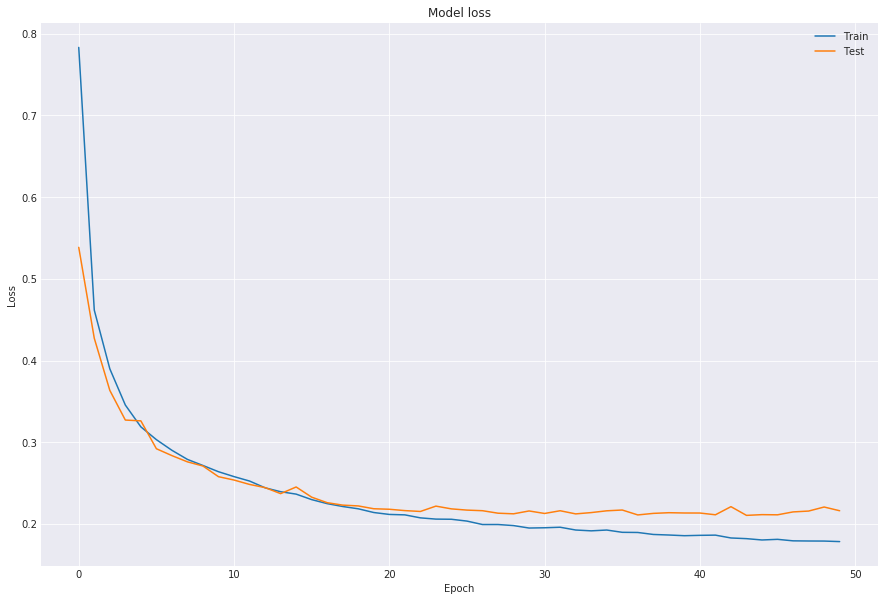

In [48]:
# Plot train vs test loss during training
plot_loss(history.history['loss'], history.history['val_loss'])

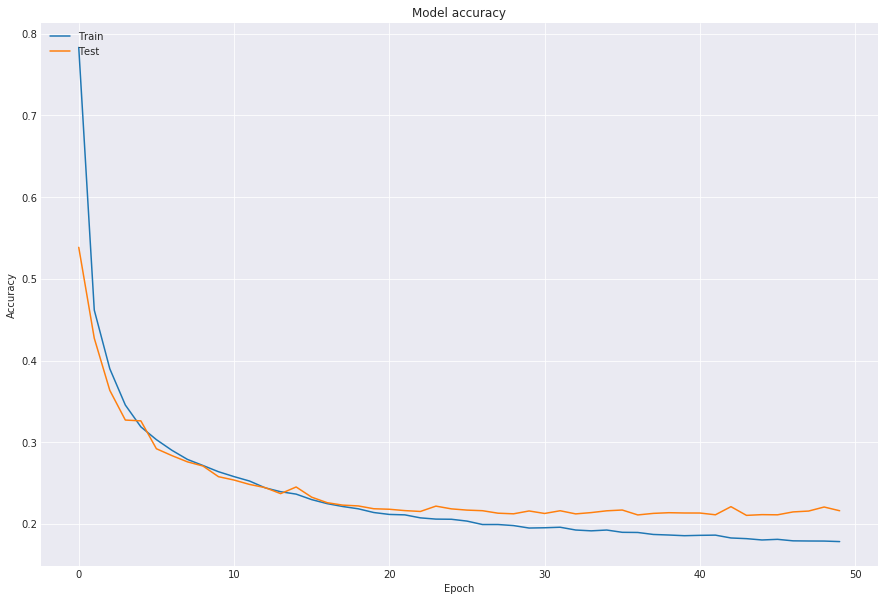

In [49]:
# Plot train vs test accuracy during training
plot_accuracy(history.history['loss'], history.history['val_loss'])

In [62]:
banknotes = pd.read_csv('data/banknotes.csv')
X = banknotes.drop('class', axis=1)
y = banknotes['class']
X_train, X_test, y_train, y_test = train_test_split(
                     X, y, test_size=0.33, random_state=42)

In [64]:
# Import the early stopping callback
from keras.callbacks import EarlyStopping

# Define a callback to monitor val_acc
monitor_val_acc = EarlyStopping(monitor='val_accuracy', 
                       patience=5)

# Train your model using the early stopping callback
model.fit(X_train, y_train, 
           epochs=1000, validation_data=(X_test, y_test),
           callbacks=[monitor_val_acc])

Train on 919 samples, validate on 453 samples
Epoch 1/1000
919/919 [==============================] - 0s 250us/step - loss: 1.8103 - accuracy: 0.5049 - val_loss: 1.3421 - val_accuracy: 0.5629
Epoch 2/1000
919/919 [==============================] - 0s 115us/step - loss: 1.0876 - accuracy: 0.6268 - val_loss: 0.8905 - val_accuracy: 0.6821
Epoch 3/1000
919/919 [==============================] - 0s 128us/step - loss: 0.7481 - accuracy: 0.7073 - val_loss: 0.6374 - val_accuracy: 0.7660
Epoch 4/1000
919/919 [==============================] - 0s 133us/step - loss: 0.5520 - accuracy: 0.7813 - val_loss: 0.4883 - val_accuracy: 0.8146
Epoch 5/1000
919/919 [==============================] - 0s 96us/step - loss: 0.4335 - accuracy: 0.8390 - val_loss: 0.3984 - val_accuracy: 0.8455
Epoch 6/1000
919/919 [==============================] - 0s 127us/step - loss: 0.3609 - accuracy: 0.8683 - val_loss: 0.3429 - val_accuracy: 0.8698
Epoch 7/1000
919/919 [==============================] - 0s 106us/step - loss: 0

In [73]:
banknotes = pd.read_csv('data/banknotes.csv')
X = banknotes.drop('class', axis=1)
y = banknotes['class']
X_train, X_test, y_train, y_test = train_test_split(
                     X, y, test_size=0.3, random_state=42)

In [74]:
# Create a sequential model
model = Sequential()

# Add a dense layer 
model.add(Dense(1, input_shape=(4,), activation='sigmoid'))

# Compile your model
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [75]:
# Import the EarlyStopping and ModelCheckpoint callbacks
from keras.callbacks import EarlyStopping, ModelCheckpoint

# Early stop on validation accuracy
monitor_val_acc = EarlyStopping(monitor = 'val_accuracy', patience=3)

# Save the best model as best_banknote_model.hdf5
modelCheckpoint = ModelCheckpoint('best_banknote_model.hdf5', save_best_only = True)

# Fit your model for a stupid amount of epochs
history = model.fit(X_train, y_train,
                    epochs = 10000000,
                    callbacks = [monitor_val_acc, modelCheckpoint],
                    validation_data = (X_test, y_test))

Train on 960 samples, validate on 412 samples
Epoch 1/10000000
960/960 [==============================] - 0s 237us/step - loss: 2.1555 - accuracy: 0.4427 - val_loss: 1.7702 - val_accuracy: 0.4466
Epoch 2/10000000
960/960 [==============================] - 0s 117us/step - loss: 1.3060 - accuracy: 0.4708 - val_loss: 0.9989 - val_accuracy: 0.4806
Epoch 3/10000000
960/960 [==============================] - 0s 117us/step - loss: 0.7355 - accuracy: 0.5719 - val_loss: 0.5824 - val_accuracy: 0.6650
Epoch 4/10000000
960/960 [==============================] - 0s 102us/step - loss: 0.4654 - accuracy: 0.7792 - val_loss: 0.4073 - val_accuracy: 0.8204
Epoch 5/10000000
960/960 [==============================] - 0s 112us/step - loss: 0.3490 - accuracy: 0.8708 - val_loss: 0.3280 - val_accuracy: 0.8932
Epoch 6/10000000
960/960 [==============================] - 0s 112us/step - loss: 0.2901 - accuracy: 0.9219 - val_loss: 0.2844 - val_accuracy: 0.9126
Epoch 7/10000000
960/960 [============================

In [80]:
import h5py
filename = 'best_banknote_model.hdf5'

with h5py.File(filename, 'r') as f:
    # List all groups
    print("Keys: %s" % f.keys())
    a_group_key = list(f.keys())[0]

    # Get the data
    data = list(f[a_group_key])
print(data)

Keys: <KeysViewHDF5 ['model_weights', 'optimizer_weights']>
['dense_16']
